# Mecánica Celeste: teoría, algoritmos y problemas
# Por Jorge I. Zuluaga

En estos cuadernos hemos compilado la mayoría de los códigos que vienen con el libro [**Mecánica Celeste: teoría, algoritmos y problemas**](https://www.buscalibre.com.co/libro-mecanica-celeste-teoria-algoritmos-y-problemas/9789585011953/p/62242977?afiliado=74c874bfb5a8145d7c1b). En cada cuaderno encontrará códigos de secciones o capítulos enteros. Para explicaciones detalladas de lo que hacen los códigos refiérase a la sección o capítulo respectivo. Para mayor comodidad puede leer o ejecutar este cuaderno usando `Google Colab`.

<a target="_blank" href="https://colab.research.google.com/github/seap-udea/pymcel/blob/main/ejemplos/cuadernos-libro/mcel_zuluaga-mecanica_newtoniana.ipynb">
  <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
</a>

## Algorítmos de Mecánica Newtoniana

### Instalación e importación

Si está usando este cuaderno en `Colab` debería instalar `pymcel` antes de comenzar: 

In [16]:
!pip install -Uq pymcel

In [1]:
# Este código se usa solamente para desarrollar estos cuadernos pero es inocuo en otros contextos
%load_ext autoreload 
%autoreload 2

### Integración numérica de las ecuaciones de movimiento

Ecuación de movimiento con tirón constante:

In [8]:
def edm_ejemplo1(Y,t,j0=1):
    dYdt=[0,0,0,0,0,0]
    
    dYdt[:3]=Y[3:]
    dYdt[3:]=[j0*t,0,0]
    
    return dYdt

Solución a la ecuación diferencial:

In [9]:
#Valor del tiron
j0=0.5

#Condiciones iniciales
from numpy import array
Yos=array([1,0,0,-3,0,0])

#Tiempos para obtener la solución
from numpy import linspace
ts=linspace(0.0,5.0,20)

#Solución con odeint
from scipy.integrate import odeint
Ys=odeint(edm_ejemplo1,Yos,ts,args=(j0,))

print(f"Solucion, Ys:\n{Ys[:5]}\n...")

Solucion, Ys:
[[ 1.     0.     0.    -3.     0.     0.   ]
 [ 0.212  0.     0.    -2.983  0.     0.   ]
 [-0.567  0.     0.    -2.931  0.     0.   ]
 [-1.327  0.     0.    -2.844  0.     0.   ]
 [-2.061  0.     0.    -2.723  0.     0.   ]]
...


Gráfico de la solución:

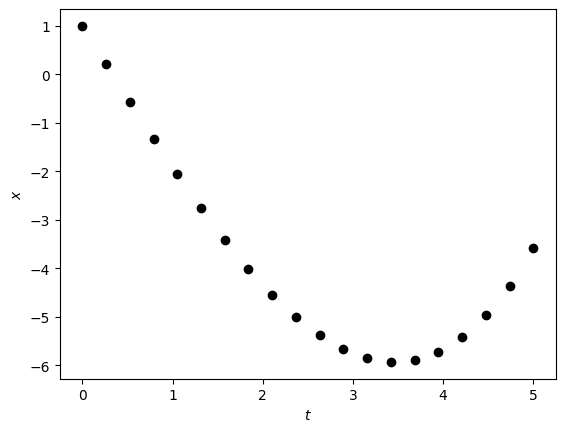

In [10]:
import matplotlib.pyplot as plt
plt.figure();
plt.plot(ts,Ys[:,0],'ko');

plt.xlabel("$t$");
plt.ylabel("$x$");
plt.show();

Cuadraturas o constantes de movimiento del sistema: 

In [11]:
#Extraemos los valores de x y dxdt de la solución
xs=Ys[:,0]
xdots=Ys[:,3]

#Fórmula de la constante C_Ix
C_Ixs=xdots-0.5*j0*ts**2

#Fórmula de la constante C_Sx
C_Sxs=xs-(1./6)*j0*ts**3-C_Ixs*ts

import numpy as np
np.set_printoptions(precision=3)
print(f"Valores de C_Ix = {C_Ixs[:5]}...")
print(f"Valores de C_Sx = {C_Sxs[:5]}...")

Valores de C_Ix = [-3. -3. -3. -3. -3.]...
Valores de C_Sx = [1. 1. 1. 1. 1.]...


Comparación de la solución numérica y la solución obtenida a partir de las constantes de movimiento:

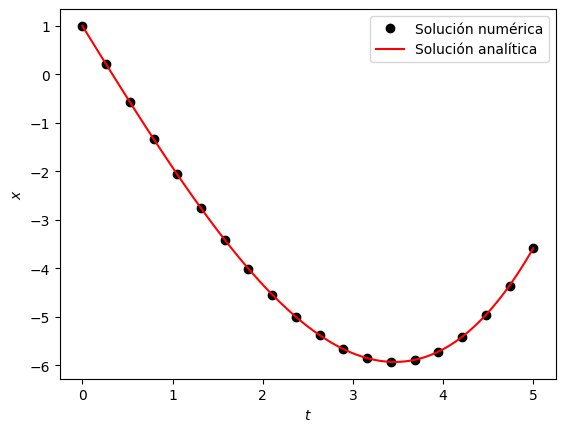

In [12]:
#Valor de las constantes de movimiento 
Ix=Yos[3]-0.5*j0*ts[0]**2
Sx=Yos[0]-(1./6)*j0*ts[0]**3+Ix*ts[0]

#Lista más completa de valores del tiempo
from numpy import linspace
tas=linspace(ts[0],ts[-1],100)

#Solución analítica
xs=(1./6)*j0*tas**3+Ix*tas+Sx

#Gráfico
plt.figure();
plt.plot(ts,Ys[:,0],'ko',label="Solución numérica");
plt.plot(tas,xs,'r-',label="Solución analítica");

plt.xlabel("$t$")
plt.ylabel("$x$")
plt.legend();
plt.show();

Solución a la ecuación de movimiento del oscilador armónico:

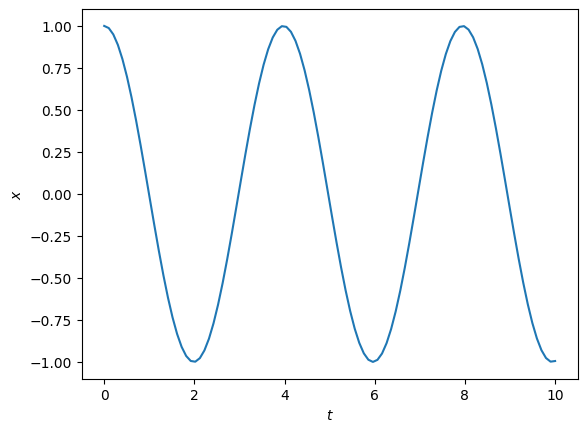

Valores de C_Ix: [1.25 1.25 1.25 1.25 1.25]...


In [14]:
def edm_ejemplo2(Y,t,omega):
    dYdt=[0,0,0,0,0,0]
    
    dYdt[:3]=Y[3:]
    dYdt[3:]=[-omega*Y[0],0,0]
    
    return dYdt

#Propiedades del sistema
omega=2.5

#Condiciones iniciales
from numpy import array
Yos=array([1,0,0,0,0,0])

#Tiempos
from numpy import linspace
ts=linspace(0,10.0,100)
#Solución
Ys=odeint(edm_ejemplo2,Yos,ts,args=(omega,))

#Constante de movimiento
xs=Ys[:,0]
xdots=Ys[:,3]
C_Ixs=0.5*xdots**2+0.5*omega*xs**2

#Gráfico
fig=plt.figure();
plt.plot(ts,Ys[:,0]);

plt.xlabel("$t$");
plt.ylabel("$x$");
plt.show();

# Constantes de movimiento
print(f"Valores de C_Ix: {C_Ixs[:5]}...")

### Postulado de gravitación universal

La fuerza del Sol sobre la Tierra y del Sol sobre la Luna:

In [15]:
# Constante de gravitación
G=6.67408e-11 #m^3/kg s^2

#Masa de los cuerpos
M_tierra=5.97e24 #kg
M_luna=7.34e22 #kg
M_sol=1.98e30 #kg 

#Distancia entre ellos
d_sol_tierra=149600000*1000 #m
d_tierra_luna=385000*1000 #m
d_sol_luna=d_sol_tierra-d_tierra_luna

F_sol_tierra=G*M_sol*M_tierra/d_sol_tierra**2
F_sol_luna=G*M_sol*M_luna/d_sol_luna**2
F_tierra_luna=G*M_tierra*M_luna/d_tierra_luna**2

print(f"F_sol_tierra = {F_sol_tierra} N ")
print(f"F_sol_luna = {F_sol_luna} N ")
print(f"F_tierra_luna = {F_tierra_luna} N ")

F_sol_tierra = 3.525069974834854e+22 N 
F_sol_luna = 4.356399422118894e+20 N 
F_tierra_luna = 1.9730602178040146e+20 N 


### Fuerzas y centro de masa

Generar un sistema de partículas con masas, posiciones y velocidades aleatorias:

In [17]:
#Número de partículas 
N=3

#Semilla de números aleatorios
from numpy.random import seed
seed(30)

#Valores aleatorios de las masas
from numpy.random import uniform
ms=uniform(0,100,size=N)

#Masa total
M=ms.sum()

#Tabla de posiciones
rs=uniform(0,2,size=(N,3))
#Ponemos todos los valores de z en 0
rs[:,2]=0

#Tabla de velocidades
vs=uniform(-0.2,0.2,size=(N,3))
#Ponemos todos los valores de vz en 0
vs[:,2]=0

from numpy import set_printoptions
set_printoptions(precision=2)
print(f"Masas:\n{ms}...")
print(f"Posiciones:\n{rs[:,:2]}\n...")
print(f"Velocidades:\n{vs[:,:2]}\n...")

Masas:
[64.41 38.07 66.3 ]...
Posiciones:
[[0.33 1.93]
 [1.98 0.47]
 [0.81 0.27]]
...
Velocidades:
[[ 0.01  0.11]
 [-0.16 -0.12]
 [-0.11 -0.1 ]]
...


Cálculo de la posición y velicidad del centro de masa:

In [18]:
from numpy import array
R_CM=sum(ms[:,None]*rs)/M
V_CM=sum(ms[:,None]*vs)/M

print(f"Posición centro de masa: {R_CM[:2]}")
print(f"Velocidad centro de masa: {V_CM[:2]}")

Posición centro de masa: [0.89 0.95]
Velocidad centro de masa: [-0.08 -0.03]


Gráfico de la posición y velocidad del centro de masa:

Paquete pymcel cargado. Versión: 0.6.0


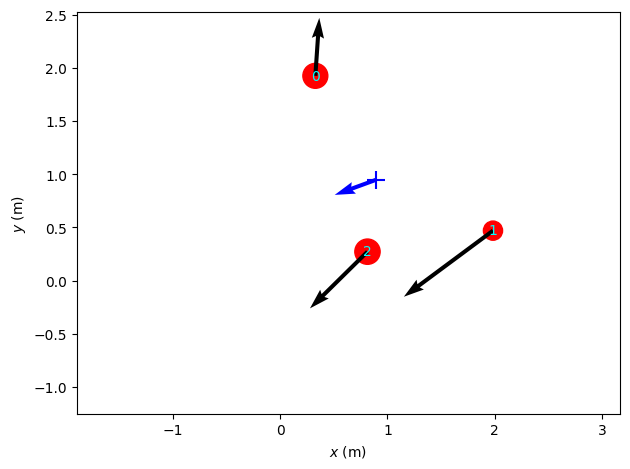

In [19]:
import matplotlib.pyplot as plt
fig=plt.figure();

#Etiquetas sobre las partículas
for i in range(N):
    plt.text(rs[i,0],rs[i,1],i,color="cyan",
             ha='center',va='center')

#Posiciones y velocidades de las partículas
plt.scatter(rs[:,0],rs[:,1],s=5*ms,c='red',marker='o')
plt.quiver(rs[:,0],rs[:,1],vs[:,0],vs[:,1],scale=1)

#Posiciones y velocidad del centro de masa
plt.scatter(R_CM[0],R_CM[1],s=M,c='blue',marker='+')
plt.quiver(R_CM[0],R_CM[1],V_CM[0],V_CM[1],color='blue',scale=1)

#Decoración
plt.xlabel("$x$ (m)");
plt.ylabel("$y$ (m)");

#Ajusta gráfico
from pymcel.plot import fija_ejes_proporcionales
fija_ejes_proporcionales(fig.gca(),(rs,R_CM),margin=0.4);
plt.tight_layout();
plt.show();

Gráfico interactivo:

In [20]:
from ipywidgets import interact

@interact(N=(2,10,1),semilla=(0,100,1))
def centro_masa_sistema(N=3,semilla=1):
    N=int(N)
    from numpy.random import seed
    seed(int(semilla))
    from numpy.random import uniform
    ms=uniform(0,100,size=N)
    M=ms.sum()
    rs=uniform(0,2,size=(N,3))
    rs[:,2]=0
    vs=uniform(-0.2,0.2,size=(N,3))
    vs[:,2]=0
    R_CM=sum(ms[:,None]*rs)/M
    V_CM=sum(ms[:,None]*vs)/M
    import matplotlib.pyplot as plt
    fig=plt.figure();
    for i in range(N):
        plt.text(rs[i,0],rs[i,1],i,color="cyan",
                 ha='center',va='center')
    plt.scatter(rs[:,0],rs[:,1],s=5*ms,c='red',marker='o')
    plt.quiver(rs[:,0],rs[:,1],vs[:,0],vs[:,1],scale=1)
    plt.scatter(R_CM[0],R_CM[1],s=M,c='blue',marker='+')
    plt.quiver(R_CM[0],R_CM[1],V_CM[0],V_CM[1],color='blue',scale=1)
    plt.xlabel("$x$ (m)");
    plt.ylabel("$y$ (m)");
    from pymcel.plot import fija_ejes_proporcionales
    fija_ejes_proporcionales(fig.gca(),(rs,R_CM),margin=0.4);
    plt.tight_layout();
    plt.show();

interactive(children=(IntSlider(value=3, description='N', max=10, min=2), IntSlider(value=1, description='semi…

## Toremas de conservación

Momentum angular de las partículas del ejemplo anterior:

In [22]:
#Momento angular de cada partícula
from numpy import cross
Ls=ms[:,None]*cross(rs,vs)

#Momento angular total
L=sum(Ls)

print(f"Momentos angulares individuales:\n{Ls}")
print(f"Momento angular total:\n{L}")

Momentos angulares individuales:
[[ 0.    0.    1.35]
 [ 0.   -0.   -6.25]
 [ 0.   -0.   -3.72]]
Momento angular total:
[ 0.    0.   -8.62]


Hagamos que las partículas se muevan:

In [23]:
#Tiempo futuro
t=10.0

#Posición y velocidad de las partículas en t
rs_t=rs+10*vs
vs_t=vs

print(f"Posiciones iniciales: rs =\n{rs}")
print(f"Posiciones finales: vs =\n{rs_t}")

Posiciones iniciales: rs =
[[0.33 1.93 0.  ]
 [1.98 0.47 0.  ]
 [0.81 0.27 0.  ]]
Posiciones finales: vs =
[[ 0.4   2.99  0.  ]
 [ 0.34 -0.75  0.  ]
 [-0.25 -0.77  0.  ]]


Calculemos nuevamente el momentum angular:

In [25]:
#Momento angular de cada partícula
from numpy import cross
Ls_t=ms[:,None]*cross(rs_t,vs_t)

#Momento angular total
L_t=Ls_t.sum(axis=0)

print(f"Momentos angulares después:\n{Ls_t}")
print(f"Momento angular total después:\n{L_t}")

Momentos angulares después:
[[ 0.    0.    1.35]
 [ 0.   -0.   -6.25]
 [ 0.    0.   -3.72]]
Momento angular total después:
[ 0.    0.   -8.62]


### Dinámica referida al centro de masa

Calculemos ahora el momentum angular del centro de masa:

In [27]:
#Momento angular del centro de masaa
from numpy import cross
L_CM=M*cross(R_CM,V_CM)

print(f"Momento angular del centro de masa:\n{L_CM}")

Momento angular del centro de masa:
[ 0.   -0.    7.96]


Calculemos la posición de las partículas respecto del centro de masa:

In [29]:
#Posición y velocidad referida al centro de masa
from numpy import subtract
rps=subtract(rs,R_CM)
vps=subtract(vs,V_CM)

print(f"Posiciones respecto al CM:\n{rps[:,:2]}")
print(f"Velocidades respecto al CM:\n{vps[:,:2]}")

Posiciones respecto al CM:
[[-0.56  0.98]
 [ 1.09 -0.48]
 [-0.08 -0.68]]
Velocidades respecto al CM:
[[ 0.08  0.13]
 [-0.09 -0.09]
 [-0.03 -0.08]]


Podemos ahora calcular la posición y velocidad del centro de masa respecto del centro de masa y verificar que son cero:

In [32]:
R_CM_CM=sum(ms[:,None]*rps)/M
V_CM_CM=sum(ms[:,None]*vps)/M

print(f"Posiciones del CM respecto al CM:\n{R_CM_CM[:2]}")
print(f"Posiciones del CM respecto al CM:\n{V_CM_CM[:2]}")

Posiciones del CM respecto al CM:
[1.53e-16 0.00e+00]
Posiciones del CM respecto al CM:
[-3.95e-18  5.26e-18]


Ahora calculamos el momentum angular usando posiciones y velocidades respecto del centro de masa:

In [33]:
#Momento angular de cada partícula
from numpy import cross
Lps=ms[:,None]*cross(rps,vps)

#Momento angular total
Lp=sum(Lps)

print(f"Momento angular total referido al centro de masa:\n{Lp}")

Momento angular total referido al centro de masa:
[  0.     0.   -16.58]


El mismo momentum angular calculado con otro método produce:

In [34]:
#Momento angular total
L=L_CM+Lp

print(f"Momento angular total:\n{L}")

Momento angular total:
[ 0.    0.   -8.62]


### Energía cinética total del sistema

Ahora calculamos la energía cinética total del sistema:

In [36]:
#Magnitud de las velocidades de las partículas
from numpy.linalg import norm
vmags=norm(vs,axis=1)

#Energía cinética individual de cada partícula
Ks=0.5*ms*vmags**2

#Energía cinética total
K=sum(Ks)

print(f"Energía cinética de las partículas:\n{Ks}")
print(f"Energía cinética total: {K:.2f}")

Energía cinética de las partículas:
[0.37 0.79 0.73]
Energía cinética total: 1.90


El cálculo de la energía cinética usando posiciones y velocidades relativas al centro de masa debe producir el mismo resultado:

In [37]:
#Energía cinética del centro de masa:
K_CM=0.5*M*norm(V_CM)**2

#Magnitud de las velocidades
vpmags=norm(vps,axis=1)

#Energía cinética individual de cada partícula
Kps=0.5*ms*vpmags**2

#Energía cinética en el centro de masa
Kp=Kps.sum()

#Energía total
K=K_CM+Kp

print(f"Energía cinética del CM: {K_CM}")
print(f"Energía cinética de las partículas (respecto al CM): {Kps}")
print(f"Energía cinética total (respecto al CM): {Kp:.2f}")
print(f"Energía cinética total: {K:.2f}")

Energía cinética del CM: 0.5505136059795793
Energía cinética de las partículas (respecto al CM): [0.8  0.32 0.22]
Energía cinética total (respecto al CM): 1.35
Energía cinética total: 1.90


<hr/>

Para explorar más cuadernos del libro vaya al [repositorio de en GitHub](https://github.com/seap-udea/pymcel/tree/main/ejemplos/cuadernos-libro)